# Verify Bayesian optimization standard deviation reflects plot size fairly

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import seed

# GPR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct, ConstantKernel, WhiteKernel

%matplotlib inline

In [28]:
# Definition of a black-box function to test

def f_y(x) :
    y = -1 * (x * np.sin(x * np.pi/30.0) + 100 + np.random.normal(0,1,1))
    return y

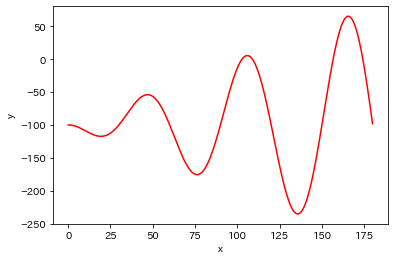

In [29]:
# Draw black-box function

x = np.arange(0, 180, 0.1)
y = f_y(x)
plt.plot(x, y, c = 'r')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Make samples to make predisction model within the range from 1 to 180, while missing samples from 60 to 100, with the step of 5

In [30]:
x1 = np.arange(0, 60, 5)
x2 = np.arange(100, 180, 5)

x = np.hstack((x1, x2))
x

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55, 100,
       105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165,
       170, 175])

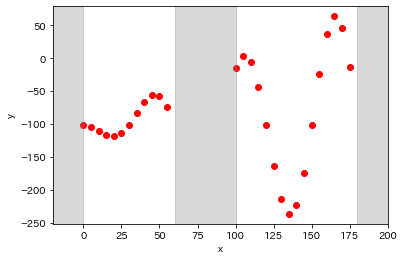

In [31]:
# Draw sample distribution

y = f_y(x)
plt.scatter(x, y, c = 'r')

#plt.axvline(x = 0,   ymin = -250, ymax = 80)
#plt.axvline(x = 60,  ymin = -250, ymax = 80)
#plt.axvline(x = 100, ymin = -250, ymax = 80)
#plt.axvline(x = 180, ymin = -250, ymax = 80)

plt.axvspan(-20, 0, color = "gray", alpha = 0.3)       # samples are missing in the gray are
plt.axvspan(60, 100, color = "gray", alpha = 0.3)
plt.axvspan(180, 200, color = "gray", alpha = 0.3)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-20, 200)
plt.show()

# Make a model using Gaussian process regression

In [32]:
# kernel

kernel = ConstantKernel() * RBF() + WhiteKernel() + ConstantKernel() * DotProduct()

In [36]:
# Make a model

x = x.reshape(-1,1)
y = y.reshape(-1,1)
model = GaussianProcessRegressor(kernel = kernel).fit(x, y)
model

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1) + 1**2 * DotProduct(sigma_0=1))

# Overlay graph

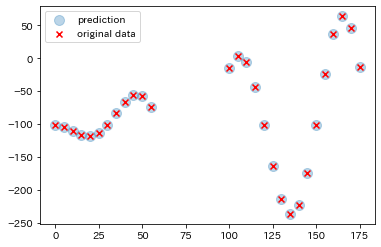

In [43]:
plt.scatter(x, model.predict(x), s = 100, alpha = 0.3, label = 'prediction')
plt.scatter(x, y, c = 'r', marker = 'x', label = 'original data')
plt.legend(loc = 'best')
plt.show()

# Plot prediction over the true curve including extrapolation renge, reflecting standard deviation as a circle size (large circle = small standard deviation) at the sampling points

In [47]:
x_test = np.arange(-100, 300, 3).reshape(-1,1)

pred_y_mean, pred_y_std = model.predict(x_test, return_std = True)

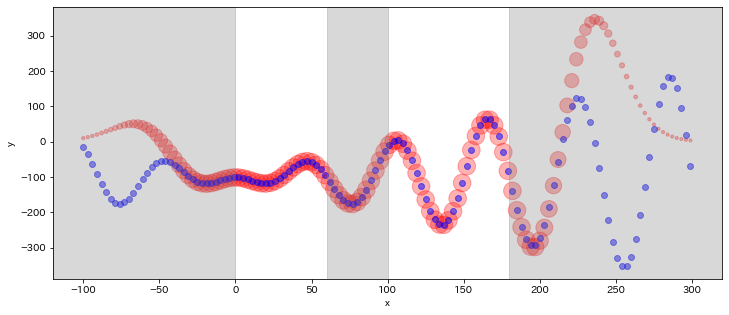

In [56]:
fig = plt.figure(figsize=(12, 5))

std_max = pred_y_std.max()
std_min = pred_y_std.min()
m_size = 10 + 300 * (std_max - pred_y_std) / (std_max - std_min)

plt.scatter(x_test, pred_y_mean, c = 'r', marker = 'o', alpha = 0.3, s = m_size)
plt.scatter(x_test, f_y(x_test), c = 'b', marker = 'o', alpha = 0.5)
plt.xlabel('x')
plt.ylabel('y')

plt.axvspan(-120, 0, color = "gray", alpha = 0.3)       # samples are missing in the gray are
plt.axvspan(60, 100, color = "gray", alpha = 0.3)
plt.axvspan(180, 320, color = "gray", alpha = 0.3)
plt.xlim(-120, 320)

plt.show()

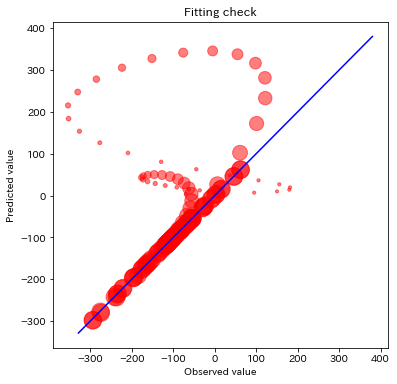

In [54]:
fig = plt.figure(figsize=(6, 6))

slp_1_begin = 1.1 * pred_y_mean.min()
slp_1_end   = 1.1 * pred_y_mean.max()

plt.scatter(f_y(x_test), pred_y_mean, c = 'r', s = m_size, alpha = 0.5)
plt.plot([slp_1_begin, slp_1_end], [slp_1_begin, slp_1_end], c = 'b')
plt.title('Fitting check')
plt.xlabel('Observed value')
plt.ylabel('Predicted value')

plt.show()

# Circle size is determined by a mini-max concept, and it looks working well.